## Setup

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../."
CHAPTER_ID = "lab1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="png"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path


## Quantum bits

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

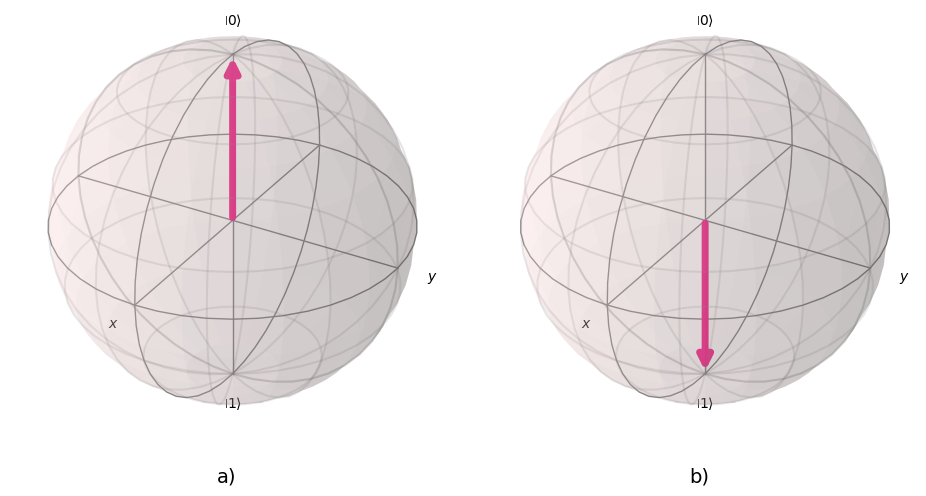

In [7]:
# Represent |0> and |1> on the Bloch sphere
qc = QuantumCircuit(2)
qc.initialize([1, 0], 0)  # Qubit 0 is |0⟩
qc.initialize([0,1],1) # Qubit 1 is |1>
# Get statevector
psi = Statevector.from_instruction(qc)
# Plot and save the figure

fig=plot_bloch_multivector(psi)
for ax in fig.axes:
    ax.set_title("")

# Add labels under each Bloch sphere
labels = ['a)', 'b)']
for ax, label in zip(fig.axes, labels):
    # Position text centered under each axis:
    # The coordinates are figure-relative; adjust y for spacing below axes.
    bbox = ax.get_position()
    x = bbox.x0 + bbox.width / 2
    y = bbox.y0 - 0.05  # slightly below the axis
    fig.text(x, y, label, ha='center', va='top', fontsize=14)
    
fig.savefig(
    get_path("bloch_q_01"),
    bbox_inches='tight',
    pad_inches=0)
fig

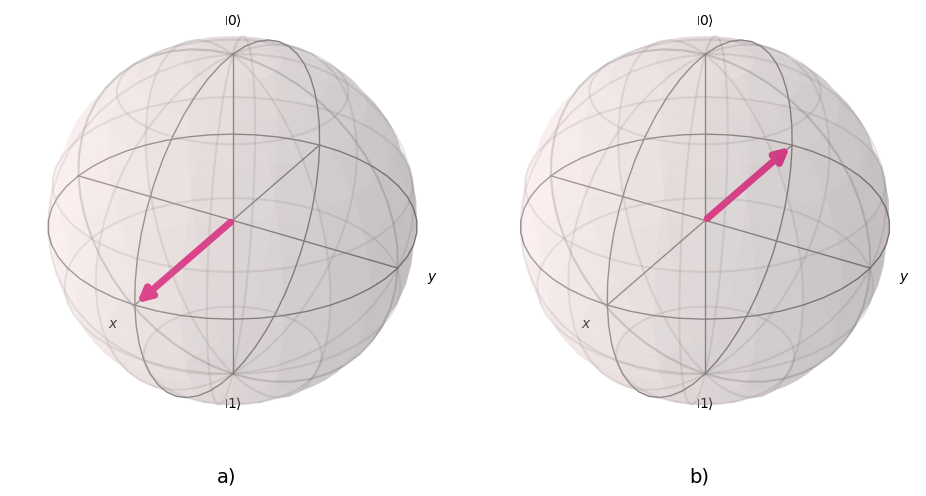

In [8]:
# Represent |+> and |-> on the Bloch sphere
qc = QuantumCircuit(2)
qc.initialize([1, 0], 0)  # Qubit 0 is |0⟩
qc.initialize([0,1], 1) # Qubit 1 is |1>
qc.h(0)
qc.h(1)
# Get statevector
psi = Statevector.from_instruction(qc)
# Plot and save the figure
fig=plot_bloch_multivector(psi)
for ax in fig.axes:
    ax.set_title("")

# Add labels under each Bloch sphere
labels = ['a)', 'b)']
for ax, label in zip(fig.axes, labels):
    # Position text centered under each axis:
    # The coordinates are figure-relative; adjust y for spacing below axes.
    bbox = ax.get_position()
    x = bbox.x0 + bbox.width / 2
    y = bbox.y0 - 0.05  # slightly below the axis
    fig.text(x, y, label, ha='center', va='top', fontsize=14)
    
fig.savefig(
    get_path("bloch_q_pm"),
    bbox_inches='tight',
    pad_inches=0)
fig


### Exercise 1 and 2

In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

In [7]:
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)  # Qubit 0 is |1⟩
qc.save_statevector()

simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


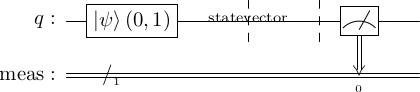

In [8]:
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)  # Qubit 0 is |1⟩
qc.save_statevector()
qc.measure_all()
qc.draw("latex")

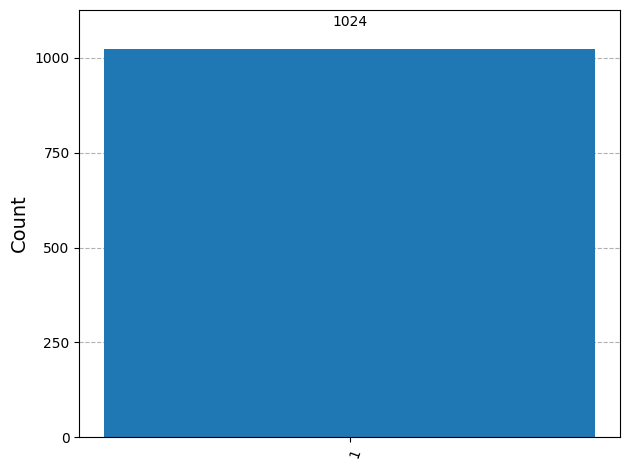

In [9]:
simulator = AerSimulator(method='statevector')

qc = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

### Exercise 3

In [8]:
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

In [9]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.save_statevector()
simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


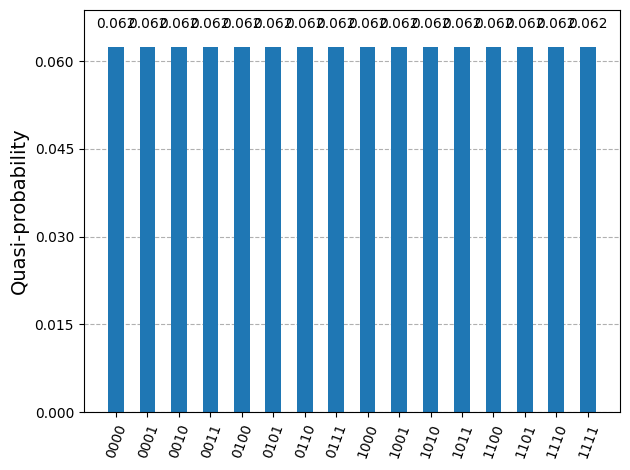

In [10]:
simulator = AerSimulator(method='statevector')

qc = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

### Exercise 4

In [11]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.h([0,1,2,3])
qc.save_statevector()
simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


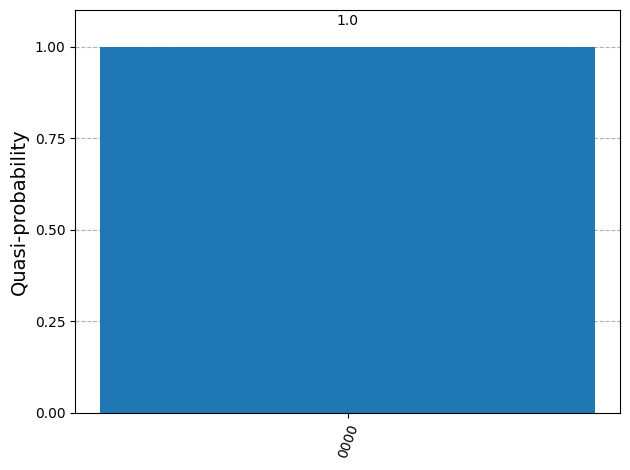

In [12]:
simulator = AerSimulator(method='statevector')

qc = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

### Exercise 5

In [18]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.save_statevector()
simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


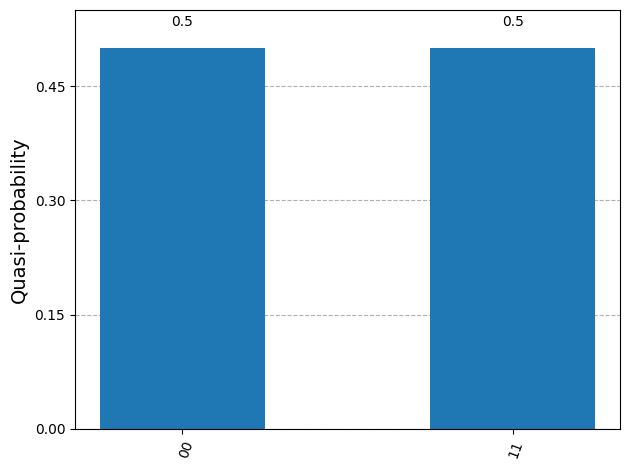

In [19]:
simulator = AerSimulator(method='statevector')

qc = transpile(qc, simulator)
# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)